In [ ]:
#instalar librerias maquina virtual
!pip install pyreadstat
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 16.7 MB 314 kB/s 
     |████████████████████████████████| 6.3 MB 56.6 MB/s 


In [ ]:
# Obtencion de datos
!wget "http://iinei.inei.gob.pe/iinei/srienaho/descarga/SPSS/729-Modulo1586.zip"
# Descomprimir
!unzip "/content/729-Modulo1586.zip" -d "/content/"

--2022-08-23 05:08:52--  http://iinei.inei.gob.pe/iinei/srienaho/descarga/SPSS/729-Modulo1586.zip
Resolving iinei.inei.gob.pe (iinei.inei.gob.pe)... 200.123.3.16
Connecting to iinei.inei.gob.pe (iinei.inei.gob.pe)|200.123.3.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182011 (178K) [application/x-zip-compressed]
Saving to: ‘729-Modulo1586.zip’

729-Modulo1586.zip  100%[===================>] 177.75K   124KB/s    in 1.4s    

2022-08-23 05:08:54 (124 KB/s) - ‘729-Modulo1586.zip’ saved [182011/182011]

Archive:  /content/729-Modulo1586.zip
  inflating: /content/a2020_COVID19.sav  
  inflating: /content/Diccionario Encuesta de impacto COVID 19.pdf  


In [ ]:
# descargar mapa del peru 
!git clone "https://github.com/juaneladio/peru-geojson"

Cloning into 'peru-geojson'...
remote: Enumerating objects: 27, done.
remote: Total 27 (delta 0), reused 0 (delta 0), pack-reused 27
Unpacking objects: 100% (27/27), done.


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [ ]:
#Lectura de datos en formato sav
df = pd.read_spss("/content/a2020_COVID19.sav")

# Creación de un diccionario para las columnas que llevan nombres en código

In [ ]:
diccionarioVentas = {}
diccionarioVentas['P_4_5_1'] = 'Disminución de la demanda de sus producto o servicios'
diccionarioVentas['P_4_5_2'] = 'Paralización de la producción a causa de la pandemia'
diccionarioVentas['P_4_5_3'] = 'Dificultad en la exportación de sus productos'
diccionarioVentas['P_4_5_4'] = 'Desabastecimiento de materias primas e insumos del mercado nacional'
diccionarioVentas['P_4_5_5'] = 'Desabastecimiento de materias primas e insumos del extranjero'
diccionarioVentas['P_4_5_6'] = 'Disminución de la inversión en maquinari y equipos'
diccionarioVentas['P_4_5_7'] = 'Retraso en el pago de facturas'
diccionarioVentas['P_4_5_8'] = 'Retraso en el cobro de facturas'
diccionarioVentas['P_4_5_9'] = 'Enfermedad de trabajadores por el COVID-19'
diccionarioVentas['P_4_5_10'] = 'Pérdida de capital de trabajo'
diccionarioVentas['P_4_5_11'] = 'Altos costos para implementar planes de seguridad (personal y/o clientes)'
diccionarioVentas['P_4_5_12'] = 'Otro'
diccionarioVentas['P_4_5_13'] = 'No tuvo problemas'

diccionarioFinanzas = {}
diccionarioFinanzas['P_4_9_1'] = 'Dificil accesibilidad a créditos de sus proveedores'
diccionarioFinanzas['P_4_9_2'] = 'Falta de liquidez para la compra de insumos o materias primas'
diccionarioFinanzas['P_4_9_3'] = 'Limitaciones para acceder a fuentes de financiamiento'
diccionarioFinanzas['P_4_9_4'] = 'Falta de liquidez para pagar remuneraciones del personal'
diccionarioFinanzas['P_4_9_5'] = 'Dificultad para pagar remuneraciones al sistema financiero'
diccionarioFinanzas['P_4_9_6'] = 'Falta de liquidez para pagar a proveedores'
diccionarioFinanzas['P_4_9_7'] = 'Dificultad para cobrar a sus clientes'
diccionarioFinanzas['P_4_9_8'] = 'Otro'
diccionarioFinanzas['P_4_9_9'] = 'NINGUNO'

diccionarioProgramasGobierno = {}
diccionarioProgramasGobierno['P_4_12_1'] = 'Suspensión perfecta de labores'
diccionarioProgramasGobierno['P_4_12_2'] = 'Subsidio del 35% para los trabajadores que ganen hasta 1500 soles'
diccionarioProgramasGobierno['P_4_12_3'] = 'Ampliación de plazos para reconocimiento de perdidas tributarias'
diccionarioProgramasGobierno['P_4_12_4'] = 'Regimen especial de depreciación y modificación de plazos de depreciación'
diccionarioProgramasGobierno['P_4_12_5'] = 'Régimen de aplazamiento y/o fraccionamiento (RAF) de deudas tributarias'
diccionarioProgramasGobierno['P_4_12_6'] = 'Mayores plazos de pago para deudas tributarias vencidas o por vencer'
diccionarioProgramasGobierno['P_4_12_7'] = 'Determinación de pagos a cuentas del impuesto a la renta (suspender o modificar)'
diccionarioProgramasGobierno['P_4_12_8'] = 'Programa Reactiva Perú'
diccionarioProgramasGobierno['P_4_12_9'] = 'Programa Arranca Perú'
diccionarioProgramasGobierno['P_4_12_10'] = 'Programa Fondo de apoyo empresarial a la MYPE (FAE MYPE)'
diccionarioProgramasGobierno['P_4_12_11'] = 'Facilidades de financiamiento a las MYPES'
diccionarioProgramasGobierno['P_4_12_12'] = 'Facilidades para el desarrollo de actividades económicas afines'
diccionarioProgramasGobierno['P_4_12_13'] = 'Otro'
diccionarioProgramasGobierno['P_4_12_14'] = 'NO ACCEDIÓ A NINGÚN PROGRAMA O MEDIDA DE INCENTIVO'
diccionarioProgramasGobierno['P_4_12_15'] = 'Bono independiente'

diccionarioNoAccesoProgramas = {}
diccionarioNoAccesoProgramas['P_4_13_1'] = 'No sabe como acceder'
diccionarioNoAccesoProgramas['P_4_13_2'] = 'Medidas insuficientes'
diccionarioNoAccesoProgramas['P_4_13_3'] = 'Trámites y/o requisitos excesivos'
diccionarioNoAccesoProgramas['P_4_13_4'] = 'Costos de implementación elevados'
diccionarioNoAccesoProgramas['P_4_13_5'] = 'Ninguno se ajusta a sus necesidades'
diccionarioNoAccesoProgramas['P_4_13_6'] = 'No tiene conocimiento'
diccionarioNoAccesoProgramas['P_4_13_7'] = 'Otro'
diccionarioNoAccesoProgramas['P_4_13_8'] = 'No necesita/No requiere/No aplica'

diccionarioEmpleo = {}
diccionarioEmpleo['P_4_8_1'] = 'No renovación de contratos'
diccionarioEmpleo['P_4_8_2'] = 'Flexibilidad de horarios'
diccionarioEmpleo['P_4_8_3'] = 'Reducción de horas trabajadas en la semana'
diccionarioEmpleo['P_4_8_4'] = 'Vacaciones adelantadas'
diccionarioEmpleo['P_4_8_5'] = 'Licencia sin goce de haber'
diccionarioEmpleo['P_4_8_6'] = 'Suspención perfecta de labores'
diccionarioEmpleo['P_4_8_7'] = 'Reducción de remuneraciones'
diccionarioEmpleo['P_4_8_8'] = 'Bono extra por trabajo presencial'
diccionarioEmpleo['P_4_8_9'] = 'Subsidio a la planilla por Decreto de urgencia (35%)'
diccionarioEmpleo['P_4_8_10'] = 'Resolución de contratos (despido)'
diccionarioEmpleo['P_4_8_11'] = 'Otro'
diccionarioEmpleo['P_4_8_12'] = 'No adoptó medidas'

diccionarioInoperatividad = {}
diccionarioInoperatividad['P_5_2_1'] = 'No tiene autorización' 
diccionarioInoperatividad['P_5_2_2'] = 'Pérdida de clientes' 
diccionarioInoperatividad['P_5_2_3'] = 'Pérdida de proveedores' 
diccionarioInoperatividad['P_5_2_4'] = 'Dificultades para cumplir el pago de remuneraciones' 
diccionarioInoperatividad['P_5_2_5'] = 'Pérdida de capital de trabajo' 
diccionarioInoperatividad['P_5_2_6'] = 'Ruptura de cadena de pagos (cuentas por cobrar)' 
diccionarioInoperatividad['P_5_2_7'] = 'Dificultades en el financiamiento' 
diccionarioInoperatividad['P_5_2_8'] = 'Altos costos para implementar planes de seguridad (personal y/o clientes)' 
diccionarioInoperatividad['P_5_2_9'] = 'Programas y/o medidas de reactivación dados por el gobierno no se ajustan a sus requerimientos' 
diccionarioInoperatividad['P_5_2_10'] = 'Otro' 
diccionarioInoperatividad['P_5_2_11'] = 'Por estado de emergencia' 

In [ ]:
print(sorted(df["DISTRITO"].unique()))

['ANCON', 'ATE', 'BARRANCO', 'BELLAVISTA', 'BREÑA', 'CALLAO', 'CARABAYLLO', 'CARMEN DE LA LEGUA REYNOSO', 'CHORRILLOS', 'CIENEGUILLA', 'COMAS', 'EL AGUSTINO', 'INDEPENDENCIA', 'JESUS MARIA', 'LA MOLINA', 'LA VICTORIA', 'LIMA', 'LINCE', 'LOS OLIVOS', 'LURIGANCHO', 'LURIN', 'MAGDALENA DEL MAR', 'MIRAFLORES', 'PACHACAMAC', 'PUCUSANA', 'PUEBLO LIBRE', 'PUENTE PIEDRA', 'RIMAC', 'SAN BORJA', 'SAN ISIDRO', 'SAN JUAN DE LURIGANCHO', 'SAN JUAN DE MIRAFLORES', 'SAN LUIS', 'SAN MARTIN DE PORRES', 'SAN MIGUEL', 'SANTA ANITA', 'SANTIAGO DE SURCO', 'SURQUILLO', 'VENTANILLA', 'VILLA EL SALVADOR', 'VILLA MARIA DEL TRIUNFO']


# Módulos de cálculo operaciones 

In [ ]:
# calcular el conteno de los valores booleanos de cada columna
def calcularConteo(diccionario, provincias = [], distritos = []):
    # aplicar filtro
    df_temp = df
    for provincia in provincias:
        filtro_provincia = df_temp['PROVINCIA']==provincia
        df_temp = df_temp[filtro_provincia]
    for distrito in distritos:
        filtro_distrito = df_temp['DISTRITO']==distrito
        df_temp = df_temp[filtro_distrito]
    # realizar el conteo
    count = {}
    for column in diccionario:
        conteo = {0:0, 1:0}
        for value in df_temp[column]:
            if value == 0:
                conteo[0] += 1
            if value == 1:
                conteo[1] += 1
        count[column] = conteo
    return count

In [ ]:
# calcula las frecuencias sin ordenarlas
def frecuenciaSinOrdenar(diccionario, titulo, provincias=[], distritos=[]):
    count = calcularConteo(diccionario,provincias,distritos)
    co = np.arange(len(diccionario))
    an = 0.30
    fig, ax = plt.subplots()
    ax.bar(co - an/2, [value[0] for value in count.values()], an, label="No")
    ax.bar(co + an/2, [value[1] for value in count.values()], an, label="Si")

    for i, j in zip(co, [value[0] for value in count.values()]):
        ax.annotate(j, xy=(i - 0.5, j + 0.2))

    for i, j in zip(co, [value[1] for value in count.values()]):
        ax.annotate(j, xy=(i, j + 0.2))

    ax.set_title(titulo)
    ax.set_ylabel('Número de empresas')
    ax.set_xticks(co)
    plt.legend()
    for i, columnName in enumerate(count):
        print(i, "->", diccionario[columnName])

In [ ]:
def frecuencia(diccionario, titulo, provincias=[], distritos=[]):
    count = calcularConteo(diccionario,provincias,distritos)
    count2 = sorted(count.items(), key=lambda x: x[1][1])
    co = np.arange(len(diccionario))
    an = 0.30
    fig, ax = plt.subplots()
    ax.barh(co - an/2, [value[1][0] for value in count2], an, label="No")
    ax.barh(co + an/2, [value[1][1] for value in count2], an, label="Si")

    for i, j in zip([value[1][0] for value in count2], co):
        ax.annotate(i, xy=(i, j - 0.5))

    for i, j in zip([value[1][1] for value in count2], co):
        ax.annotate(i, xy=(i, j ))

    ax.set_title(titulo)
    ax.set_xlabel('Número de empresas')
    ax.set_yticks(co)
    ax.set_yticklabels([diccionario[value[0]] for value in count2])
    plt.legend()
    
    plt.savefig(titulo+".svg")
    #plt.savefig(titulo+".png")


# TASK 1
En que lugares (Distrito) del Lima/Callao, es en que las empresas tuvieron mayores problemas (reducción de ventas, desempleo, finanzas)

- Problemas con respecto a sus VENTAS

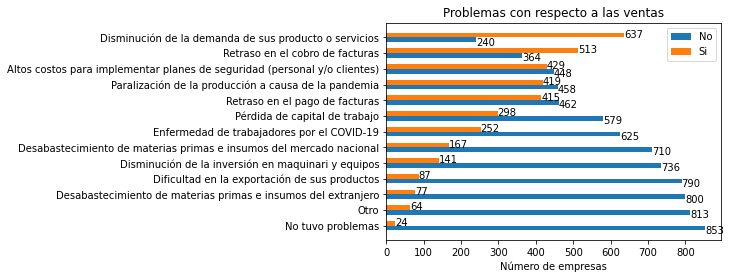

In [ ]:
frecuencia(diccionarioVentas, "Problemas con respecto a las ventas", provincias=[], distritos=[])

- Problemas con respecto a sus FINANZAS

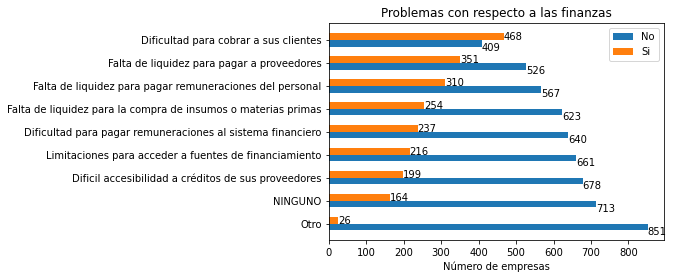

In [ ]:
frecuencia(diccionarioFinanzas, "Problemas con respecto a las finanzas", provincias=[], distritos=[])

En que distritos hubo mas problemas

In [ ]:
# recuento de empresas por provincia -> [Lima, Callao]
recuentoProvincia = {'LIMA': 0, 'CALLAO': 0}
for value in df['PROVINCIA']:
    recuentoProvincia[value] += 1
df_recuentoProvincia = pd.DataFrame()

df_recuentoProvincia['PROVINCIA'] = [val for val in recuentoProvincia]
df_recuentoProvincia['RECUENTO'] = [recuentoProvincia[val] for val in recuentoProvincia]

# recuento de empresas por distrito
recuentoDistrito = {}
for value in df['DISTRITO']:
    if value in recuentoDistrito:
        recuentoDistrito[value] += 1
    else:
        recuentoDistrito[value] = 1
df_recuentoDistrito = pd.DataFrame()

df_recuentoDistrito['DISTRITO'] = [val for val in recuentoDistrito]
df_recuentoDistrito['RECUENTO'] = [recuentoDistrito[val] for val in recuentoDistrito]

In [ ]:
# recuento de empresas inoperativas por distrito
recuentoInoperativas = {}
for row in df.values:
    
    #print(row[6], row[17])
    if row[6] not in recuentoInoperativas:
        if (row[17] == "Operativa"):
            recuentoInoperativas[row[6]] = (1,0,0)
        if (row[17] == "Parcialmente operativa"):
            recuentoInoperativas[row[6]] = (0,1,0)
        if (row[17] == "Inoperativa"):
            recuentoInoperativas[row[6]] = (0,0,1)
    else:
        if (row[17] == "Operativa"):
            recuentoInoperativas[row[6]] = (recuentoInoperativas[row[6]][0] + 1,recuentoInoperativas[row[6]][1],recuentoInoperativas[row[6]][2])
        if (row[17] == "Parcialmente operativa"):
            recuentoInoperativas[row[6]] = (recuentoInoperativas[row[6]][0],recuentoInoperativas[row[6]][1] + 1,recuentoInoperativas[row[6]][2])
        if (row[17] == "Inoperativa"):
            recuentoInoperativas[row[6]] = (recuentoInoperativas[row[6]][0],recuentoInoperativas[row[6]][1],recuentoInoperativas[row[6]][2] + 1)
df_recuentoInoperativas = pd.DataFrame()

df_recuentoInoperativas['DISTRITO'] = [val for val in recuentoInoperativas]
df_recuentoInoperativas['OPERATIVA'] = [recuentoInoperativas[val][0] for val in recuentoDistrito]
df_recuentoInoperativas['PARCIALMENTE OPERATIVA'] = [recuentoInoperativas[val][1] for val in recuentoDistrito]
df_recuentoInoperativas['INOPERATIVA'] = [recuentoInoperativas[val][2] for val in recuentoDistrito]

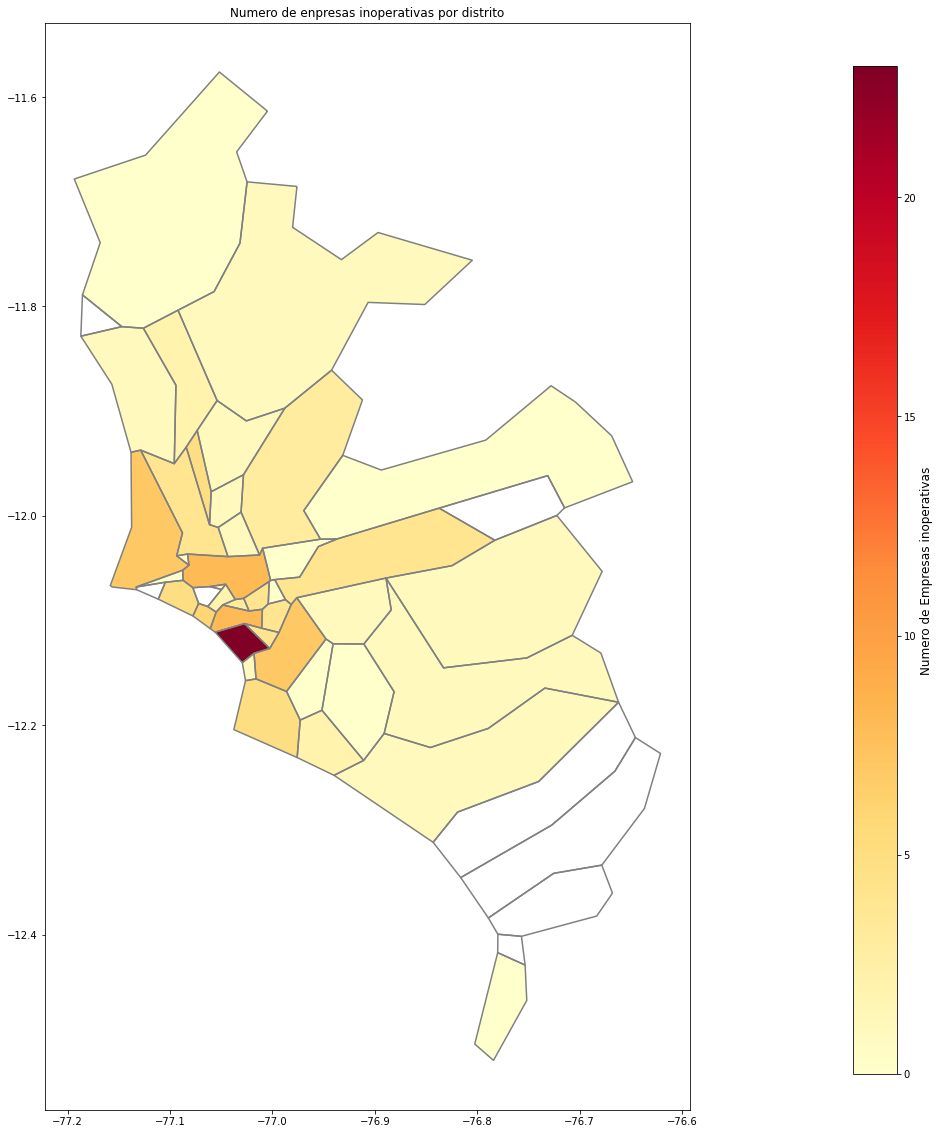

In [ ]:
districts_geojson = gpd.read_file("/content/peru-geojson/peru_distrital_simple.geojson")
districts_geojson = districts_geojson[(districts_geojson.NOMBPROV=='LIMA') | (districts_geojson.NOMBDEP=='CALLAO')]
import pandas as pd

#data=df_recuentoDistrito.merge(districts_geojson, left_on='DISTRITO', right_on='NOMBDIST',how="left")
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
data=districts_geojson.merge(df_recuentoInoperativas, left_on='NOMBDIST', right_on='DISTRITO',how="right")
from google.colab import data_table
data_table.DataTable(data, include_index=False, num_rows_per_page=10)
######################################
#Definición de los valores mínimo y máximo como límites de la barra a utilizar
min_p = min(data['INOPERATIVA'])
max_p = max(data['INOPERATIVA'])

#Definición de la barra gráfica
bar = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin = min_p , vmax=max_p))

#Se declara una lista donde se guardarán los valores de la barra
bar._A = []
#Definición de la barra (ubicación y tamaño)
# cax = plt.axes([0.85, 0.07, 0.03, 0.7])  #[xcoord, ycoord, ancho, largo]
cax = plt.axes([0.85, 0.15, 0.03, 0.7])  #[xcoord, ycoord, ancho, largo]

# Impresión de la barra gráfica donde se indican las variables superiores (bar y cax)
cbar = fig.colorbar(bar, cax=cax)
#Título de la barra
cbar.set_label('Numero de Empresas inoperativas', fontsize = 12)
##########################################333

data.plot(column = 'INOPERATIVA' , cmap = 'YlOrRd', ax = ax)

###############################################3
geopd = districts_geojson[(districts_geojson.NOMBPROV=='LIMA') | (districts_geojson.NOMBDEP=='CALLAO')]
#ax.plot(figsize=(20,20),edgecolor=u'gray', cmap='Pastel1')
#ax= provinces_geojson[provinces_geojson.FIRST_NOMB=='CALLAO']
geopd.boundary.plot(edgecolor=u'gray', ax = ax)
ax.set_title("Numero de enpresas inoperativas por distrito")

plt.savefig("mapa count.svg")

# TASK 2
Conocer el nivel de accesibilidad a los programas del gobierno.


- Programas del gobierno mas accesibles

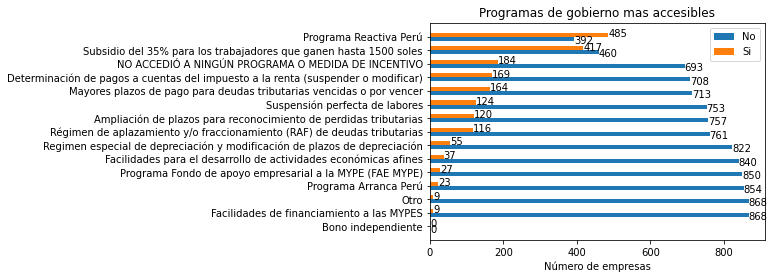

In [ ]:
frecuencia(diccionarioProgramasGobierno, "Programas de gobierno más accesibles", provincias=[], distritos=[])

- Motivos por los que no accedió a ningún programa de incentivo y/o reactivación brindado por el gobierno

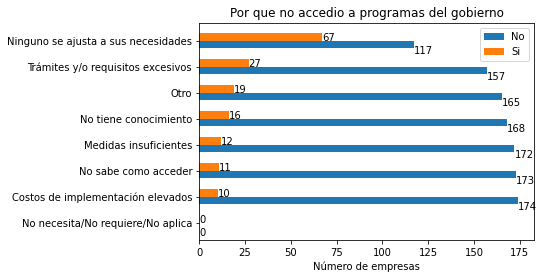

In [ ]:
frecuencia(diccionarioNoAccesoProgramas, "Por que no accedio a programas del gobierno", provincias=[], distritos=[])

- Motivos de inoperatividad

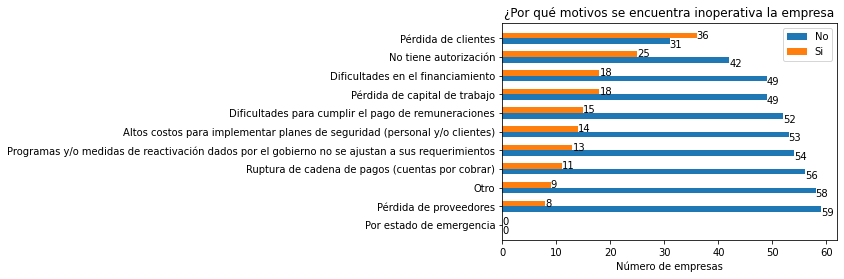

In [ ]:
frecuencia(diccionarioInoperatividad, "¿Por qué motivos se encuentra inoperativa la empresa", provincias=[], distritos=[])

# TASK 3
Que tipos de ayuda (financiamiento, reducción de restricciones, etc) se requieren para una reactivación económica
<br>
NOTA: Una reactivación con respecto al incremento de la empleabilidad

- Que medidas han optado las empresas

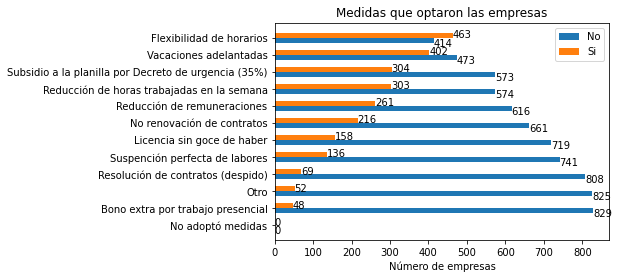

In [ ]:
frecuencia(diccionarioEmpleo, "Medidas que optaron las empresas", provincias=[], distritos=[])

In [ ]:
# recuento de empresas por provincia -> [Lima, Callao]
recuentoProvincia = {'LIMA': 0, 'CALLAO': 0}
for value in df['PROVINCIA']:
    recuentoProvincia[value] += 1

In [ ]:
recuentoProvincia

{'LIMA': 868, 'CALLAO': 61}

In [ ]:
df_recuentoProvincia = pd.DataFrame()

df_recuentoProvincia['PROVINCIA'] = [val for val in recuentoProvincia]
df_recuentoProvincia['RECUENTO'] = [recuentoProvincia[val] for val in recuentoProvincia]

In [ ]:
df_recuentoProvincia

,PROVINCIA,RECUENTO
0,LIMA,868
1,CALLAO,61


In [ ]:
# recuento de empresas por distrito
recuentoDistrito = {}
for value in df['DISTRITO']:
    if value in recuentoDistrito:
        recuentoDistrito[value] += 1
    else:
        recuentoDistrito[value] = 1

In [ ]:
recuentoDistrito

In [ ]:
df_recuentoDistrito = pd.DataFrame()

df_recuentoDistrito['PROVINCIA'] = [val for val in recuentoDistrito]
df_recuentoDistrito['RECUENTO'] = [recuentoDistrito[val] for val in recuentoDistrito]

In [ ]:
df_recuentoDistrito

In [ ]:
# recuento de empresas inoperativas por distrito
recuentoInoperativas = {}
for row in df.values:
   
   #print(row[6], row[17])
    if row[6] not in recuentoInoperativas:
        if (row[17] == "Operativa"):
            recuentoInoperativas[row[6]] = (1,0,0)
        if (row[17] == "Parcialmente operativa"):
            recuentoInoperativas[row[6]] = (0,1,0)
        if (row[17] == "Inoperativa"):
            recuentoInoperativas[row[6]] = (0,0,1)
    else:
        if (row[17] == "Operativa"):
            recuentoInoperativas[row[6]] = (recuentoInoperativas[row[6]][0] + 1,recuentoInoperativas[row[6]][1],recuentoInoperativas[row[6]][2])
        if (row[17] == "Parcialmente operativa"):
            recuentoInoperativas[row[6]] = (recuentoInoperativas[row[6]][0],recuentoInoperativas[row[6]][1] + 1,recuentoInoperativas[row[6]][2])
        if (row[17] == "Inoperativa"):
            recuentoInoperativas[row[6]] = (recuentoInoperativas[row[6]][0],recuentoInoperativas[row[6]][1],recuentoInoperativas[row[6]][2] + 1)

In [ ]:
recuentoInoperativas

In [ ]:
df_recuentoInoperativas = pd.DataFrame()

df_recuentoInoperativas['PROVINCIA'] = [val for val in recuentoInoperativas]
df_recuentoInoperativas['OPERATIVA'] = [recuentoInoperativas[val][0] for val in recuentoDistrito]
df_recuentoInoperativas['PARCIALMENTE OPERATIVA'] = [recuentoInoperativas[val][1] for val in recuentoDistrito]
df_recuentoInoperativas['INOPERATIVA'] = [recuentoInoperativas[val][2] for val in recuentoDistrito]

In [ ]:
df_recuentoInoperativas